['قفصة', 'قفصة', 'بئر الحفي', 'بئر الحفي', 'جلمة', 'جلمة', 'القيروان', 'القيروان', 'ABDELKAFI', 'ABDELKAFI', 'وكالة مدنين', 'وكالة مدنين', 'مساكن', 'مساكن', 'AGUERBA', 'AGUERBA', 'وكالة جرجيس', 'وكالة جرجيس', 'الوردانين', 'الوردانين', 'AGUEREB', 'AGUEREB', 'وكالة بن قردان', 'وكالة بن قردان', 'المنستير', 'المنستير', 'AKARIT', 'AKARIT', 'وكالة حومة السوق', 'وكالة حومة السوق', 'سيدي علي بن عون', 'AMRA', 'سيدي علي بن عون', 'وكالة ميدون', 'AMRA', 'سيدي بوزيد', 'وكالة ميدون', 'AOULED MSALLEM', 'سيدي بوزيد', 'وكالة بن خداش', 'AOULED MSALLEM', 'الحاجب', 'وكالة بن خداش', 'ATYRI', 'الحاجب', 'وكالة تطاوين', 'ATYRI', 'كندار', 'وكالة تطاوين', 'BDERNA', 'كندار', 'وكالة غمراسن', 'BDERNA', 'نابل', 'وكالة غمراسن', 'BEN GUERDENE', 'نابل', 'وكالة مدنين', 'BEN GUERDENE', 'بئـــر الحفي', 'وكالة مدنين', 'BIR AKERMA', 'بئـــر الحفي', 'وكالة جرجيس', 'BIR AKERMA', 'بوثادي', 'وكالة جرجيس', 'BIR ALI', 'بوثادي', 'وكالة بن قردان', 'BIR ALI', 'السواسي', 'BIR BIN AYED', 'وكالة بن قردان', 'وكالة حومة السوق', 'السواسي

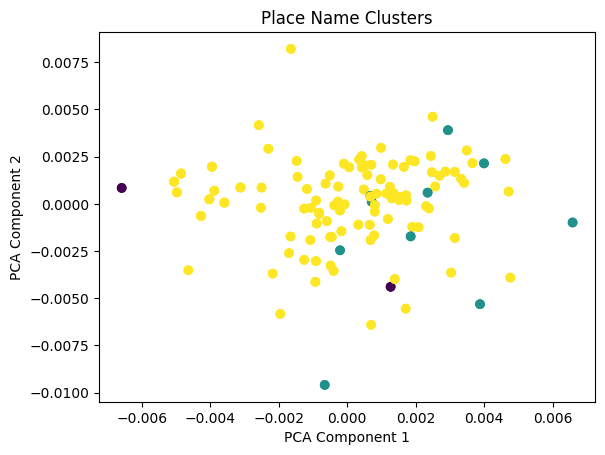

In [13]:
import pandas as pd
from langdetect import detect
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from gensim.models import FastText
import matplotlib.pyplot as plt
from pymongo import MongoClient
import os


MONGO_URI = os.getenv("MONGO_URI")
client = MongoClient(MONGO_URI)
db = client["Transport"]
places = list(db["Places"].find({}, {"_id": 0, "Name": 1}))
data = [place["Name"] for place in places]
print(data)
# Step 1: Load your data

# Step 2: Detect language and preprocess
languages = [detect(place) for place in data]
normalized_places = [place.lower() for place in data]

# Step 3: Create word embeddings (using FastText as an example)
model = FastText(sentences=[normalized_places], vector_size=100, window=3, min_count=1)

# Get embeddings for each place name
embeddings = np.array([model.wv[place] for place in normalized_places])

# Step 4: Clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(embeddings)

# Step 5: Evaluate results
df = pd.DataFrame(
    {"Place": normalized_places, "Language": languages, "Cluster": clusters}
)
print(df)

# Optional Step 6: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize clusters (if needed)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters)
plt.title("Place Name Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
from sklearn.neighbors import KNeighborsTransformer

transformer = KNeighborsTransformer(n_neighbors=5, mode="connectivity")

In [35]:
# Step 2: Normalize data
normalized_data = [name.lower().replace("-", " ").strip() for name in data]
print(normalized_data)
# Step 3: Load mBERT or similar model for embeddings


# Step 4: Get embeddings
def get_embeddings(places):
    inputs = tokenizer(places, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()


embeddings = get_embeddings(normalized_data)

# Step 5: Clustering
kmeans = KMeans(
    n_clusters=120, algorithm="elkan"
)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(embeddings)

# Step 6: Evaluate results
df = pd.DataFrame({"Place": normalized_data, "Cluster": clusters})
df

['قفصة', 'قفصة', 'بئر الحفي', 'بئر الحفي', 'جلمة', 'جلمة', 'القيروان', 'القيروان', 'abdelkafi', 'abdelkafi', 'وكالة مدنين', 'وكالة مدنين', 'مساكن', 'مساكن', 'aguerba', 'aguerba', 'وكالة جرجيس', 'وكالة جرجيس', 'الوردانين', 'الوردانين', 'aguereb', 'aguereb', 'وكالة بن قردان', 'وكالة بن قردان', 'المنستير', 'المنستير', 'akarit', 'akarit', 'وكالة حومة السوق', 'وكالة حومة السوق', 'سيدي علي بن عون', 'amra', 'سيدي علي بن عون', 'وكالة ميدون', 'amra', 'سيدي بوزيد', 'وكالة ميدون', 'aouled msallem', 'سيدي بوزيد', 'وكالة بن خداش', 'aouled msallem', 'الحاجب', 'وكالة بن خداش', 'atyri', 'الحاجب', 'وكالة تطاوين', 'atyri', 'كندار', 'وكالة تطاوين', 'bderna', 'كندار', 'وكالة غمراسن', 'bderna', 'نابل', 'وكالة غمراسن', 'ben guerdene', 'نابل', 'وكالة مدنين', 'ben guerdene', 'بئـــر الحفي', 'وكالة مدنين', 'bir akerma', 'بئـــر الحفي', 'وكالة جرجيس', 'bir akerma', 'بوثادي', 'وكالة جرجيس', 'bir ali', 'بوثادي', 'وكالة بن قردان', 'bir ali', 'السواسي', 'bir bin ayed', 'وكالة بن قردان', 'وكالة حومة السوق', 'السواسي

/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (113) found smaller than n_clusters (120). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,Place,Cluster
0,قفصة,103
1,قفصة,103
2,بئر الحفي,18
3,بئر الحفي,18
4,جلمة,82
...,...,...
237,soudene,39
238,stouh,49
239,thehra,56
240,zaafrana,22


In [23]:
df.Cluster.unique()

array([12, 93, 76, 42,  4, 63, 35, 97,  5, 50, 38,  2, 85, 36, 22, 96, 70,
       11, 91,  9, 86, 80, 19, 34, 79, 30, 31, 24,  8, 46,  3, 60, 52, 49,
       94, 23, 67, 69, 68, 17, 65, 55,  0, 59, 25,  6, 95, 14, 98, 27, 82,
       41, 21, 29, 18, 58, 81, 83, 73, 53, 62, 75, 72, 47, 99, 61, 54, 77,
       71, 78, 43, 66,  7, 88, 33, 90, 20, 10, 16, 39, 15, 48, 74, 45, 40,
        1, 56, 13, 87, 92, 28, 37, 64, 84, 32, 44, 51, 57, 26, 89],
      dtype=int32)

In [37]:
df[df["Cluster"] == 39]

,Place,Cluster
223,soudene,39
237,soudene,39


In [34]:
len(data)

242

In [39]:
X_dist_graph = transformer.fit_transform(embeddings)

In [41]:
X_dist_graph.get_shape()

(242, 242)

In [1]:
# Arabic to English letter mapping
arabic_to_english = {
    "ا": "A",
    "ب": "B",
    "ت": "T",
    "ث": "TH",
    "ج": "J",
    "ح": "H",
    "خ": "KH",
    "د": "D",
    "ذ": "DH",
    "ر": "R",
    "ز": "Z",
    "س": "S",
    "ش": "SH",
    "ص": "S",
    "ض": "D",
    "ط": "T",
    "ظ": "DH",
    "ع": "A",
    "غ": "GH",
    "ف": "F",
    "ق": "Q",
    "ك": "K",
    "ل": "L",
    "م": "M",
    "ن": "N",
    "ه": "H",
    "و": "W",
    "ي": "I",
    "ئ": "I",
    "ة": "A",
    " ": " ",
}

In [18]:
import pandas as pd
from langdetect import detect
import numpy as np
from pymongo import MongoClient
import os


MONGO_URI = os.getenv("MONGO_URI")
client = MongoClient(MONGO_URI)
db = client["Transport"]
references = list(db["Places"].find({"Company": "Soretras"}, {"_id": 0, "Name": 1}))
references = [place["Name"] for place in references]
places = list(
    db["Places"].find({"Company": {"$in": ["SRTM", "SRTG"]}}, {"_id": 0, "Name": 1})
)

data = [place["Name"] for place in places]
print(data)

/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/pymongo/ocsp_support.py:280: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to this_update_utc.
  if response.this_update > now:
/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/pymongo/ocsp_support.py:284: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to next_update_utc.
  if response.next_update and response.next_update < now:
/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/pymongo/ocsp_cache.py:65: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecated. Please switch to next_update_utc.
  if value.next_update is None:
/home/hamza/miniconda3/envs/tuntrans/lib/python3.12/site-packages/pymongo/ocsp_cache.py:71: CryptographyDeprecationWarning: Properties that return a naïve datetime object have been deprecate

['قفصة', 'قفصة', 'بئر الحفي', 'بئر الحفي', 'جلمة', 'جلمة', 'القيروان', 'القيروان', 'وكالة مدنين', 'وكالة مدنين', 'مساكن', 'مساكن', 'وكالة جرجيس', 'وكالة جرجيس', 'الوردانين', 'الوردانين', 'وكالة بن قردان', 'وكالة بن قردان', 'المنستير', 'المنستير', 'وكالة حومة السوق', 'وكالة حومة السوق', 'سيدي علي بن عون', 'سيدي علي بن عون', 'وكالة ميدون', 'سيدي بوزيد', 'وكالة ميدون', 'سيدي بوزيد', 'وكالة بن خداش', 'الحاجب', 'وكالة بن خداش', 'الحاجب', 'وكالة تطاوين', 'كندار', 'وكالة تطاوين', 'كندار', 'وكالة غمراسن', 'نابل', 'وكالة غمراسن', 'نابل', 'وكالة مدنين', 'بئـــر الحفي', 'وكالة مدنين', 'بئـــر الحفي', 'وكالة جرجيس', 'بوثادي', 'وكالة جرجيس', 'بوثادي', 'وكالة بن قردان', 'السواسي', 'وكالة بن قردان', 'وكالة حومة السوق', 'السواسي', 'كركر', 'وكالة حومة السوق', 'وكالة ميدون', 'كركر', 'مســــاكن', 'وكالة ميدون', 'وكالة بن خداش', 'مســــاكن', 'سوسة', 'وكالة بن خداش', 'وكالة تطاوين', 'سوسة', 'أم العرائس', 'وكالة تطاوين', 'وكالة غمراسن', 'المتلوي', 'أم العرائس', 'بلخير', 'وكالة غمراسن', 'قابس', 'المتلوي', 'م

In [19]:
import re


def tans_ar_eng(word: str) -> str:
    v = ""
    new_word = re.sub(r"[^A-Za-z]", "", word)
    if new_word == "":
        for i in word:
            if i in arabic_to_english:
                v += arabic_to_english[i]
            else:
                v += "<unk>"
        return v
    return word

In [20]:
new = []
for word in data:
    new_word = tans_ar_eng(word)
    new.append(new_word)

In [21]:
new

['QFSA',
 'QFSA',
 'BIR ALHFI',
 'BIR ALHFI',
 'JLMA',
 'JLMA',
 'ALQIRWAN',
 'ALQIRWAN',
 'WKALA MDNIN',
 'WKALA MDNIN',
 'MSAKN',
 'MSAKN',
 'WKALA JRJIS',
 'WKALA JRJIS',
 'ALWRDANIN',
 'ALWRDANIN',
 'WKALA BN QRDAN',
 'WKALA BN QRDAN',
 'ALMNSTIR',
 'ALMNSTIR',
 'WKALA HWMA ALSWQ',
 'WKALA HWMA ALSWQ',
 'SIDI ALI BN AWN',
 'SIDI ALI BN AWN',
 'WKALA MIDWN',
 'SIDI BWZID',
 'WKALA MIDWN',
 'SIDI BWZID',
 'WKALA BN KHDASH',
 'ALHAJB',
 'WKALA BN KHDASH',
 'ALHAJB',
 'WKALA TTAWIN',
 'KNDAR',
 'WKALA TTAWIN',
 'KNDAR',
 'WKALA GHMRASN',
 'NABL',
 'WKALA GHMRASN',
 'NABL',
 'WKALA MDNIN',
 'BI<unk><unk><unk>R ALHFI',
 'WKALA MDNIN',
 'BI<unk><unk><unk>R ALHFI',
 'WKALA JRJIS',
 'BWTHADI',
 'WKALA JRJIS',
 'BWTHADI',
 'WKALA BN QRDAN',
 'ALSWASI',
 'WKALA BN QRDAN',
 'WKALA HWMA ALSWQ',
 'ALSWASI',
 'KRKR',
 'WKALA HWMA ALSWQ',
 'WKALA MIDWN',
 'KRKR',
 'MS<unk><unk><unk><unk>AKN',
 'WKALA MIDWN',
 'WKALA BN KHDASH',
 'MS<unk><unk><unk><unk>AKN',
 'SWSA',
 'WKALA BN KHDASH',
 'WKALA TTA

In [22]:
from fuzzywuzzy import fuzz
from collections import defaultdict


def group_similar_words(word_list, reference_word, threshold=80):
    # Create a dictionary to hold grouped words
    grouped_words = defaultdict(list)

    # Calculate similarity and group words
    for word in word_list:
        similarity_score = fuzz.ratio(reference_word.lower(), word.lower())
        if similarity_score >= threshold:
            grouped_words[similarity_score].append(word)

    return dict(grouped_words)

In [25]:
# Example usage
map = {}

for reference in references:
    result = group_similar_words(new, reference, threshold=70)
    map[reference] = result

# Print the result
for ref, result in map.items():
    print(f"Similarity Score: {ref} -> Words: {result}")

Similarity Score: ABDELKAFI -> Words: {}
Similarity Score: AGUERBA -> Words: {}
Similarity Score: AGUEREB -> Words: {}
Similarity Score: AKARIT -> Words: {}
Similarity Score: AMRA -> Words: {}
Similarity Score: AOULED MSALLEM -> Words: {}
Similarity Score: ATYRI -> Words: {}
Similarity Score: BDERNA -> Words: {}
Similarity Score: BEN GUERDENE -> Words: {}
Similarity Score: BIR AKERMA -> Words: {}
Similarity Score: BIR ALI -> Words: {88: ['BIR ALHFI', 'BIR ALHFI'], 100: ['BIR ALI', 'BIR ALI']}
Similarity Score: BIR BIN AYED -> Words: {}
Similarity Score: BIR BRAHIM -> Words: {74: ['BIR ALHFI', 'BIR ALHFI'], 71: ['BIR ALI', 'BIR ALI']}
Similarity Score: BIR INDES -> Words: {}
Similarity Score: BIR MELOULI -> Words: {}
Similarity Score: BOUAKAZINE -> Words: {}
Similarity Score: BOULADHIEB -> Words: {}
Similarity Score: BOUTHADIY -> Words: {75: ['BWTHADI', 'BWTHADI']}
Similarity Score: CHAAL -> Words: {}
Similarity Score: CHEBBA -> Words: {}
Similarity Score: DAHMENI -> Words: {}
Similarit

In [15]:
result

{100: ['بئر علي'], 88: ['بئر علي 2']}

In [26]:
new

['QFSA',
 'QFSA',
 'BIR ALHFI',
 'BIR ALHFI',
 'JLMA',
 'JLMA',
 'ALQIRWAN',
 'ALQIRWAN',
 'WKALA MDNIN',
 'WKALA MDNIN',
 'MSAKN',
 'MSAKN',
 'WKALA JRJIS',
 'WKALA JRJIS',
 'ALWRDANIN',
 'ALWRDANIN',
 'WKALA BN QRDAN',
 'WKALA BN QRDAN',
 'ALMNSTIR',
 'ALMNSTIR',
 'WKALA HWMA ALSWQ',
 'WKALA HWMA ALSWQ',
 'SIDI ALI BN AWN',
 'SIDI ALI BN AWN',
 'WKALA MIDWN',
 'SIDI BWZID',
 'WKALA MIDWN',
 'SIDI BWZID',
 'WKALA BN KHDASH',
 'ALHAJB',
 'WKALA BN KHDASH',
 'ALHAJB',
 'WKALA TTAWIN',
 'KNDAR',
 'WKALA TTAWIN',
 'KNDAR',
 'WKALA GHMRASN',
 'NABL',
 'WKALA GHMRASN',
 'NABL',
 'WKALA MDNIN',
 'BI<unk><unk><unk>R ALHFI',
 'WKALA MDNIN',
 'BI<unk><unk><unk>R ALHFI',
 'WKALA JRJIS',
 'BWTHADI',
 'WKALA JRJIS',
 'BWTHADI',
 'WKALA BN QRDAN',
 'ALSWASI',
 'WKALA BN QRDAN',
 'WKALA HWMA ALSWQ',
 'ALSWASI',
 'KRKR',
 'WKALA HWMA ALSWQ',
 'WKALA MIDWN',
 'KRKR',
 'MS<unk><unk><unk><unk>AKN',
 'WKALA MIDWN',
 'WKALA BN KHDASH',
 'MS<unk><unk><unk><unk>AKN',
 'SWSA',
 'WKALA BN KHDASH',
 'WKALA TTA